# IMPORT

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

# CREATION DATAFRAMES

In [2]:
targets = ['RES1_BASE', 'RES11_BASE', 'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC','PRO2_HP']
dfs = []

In [3]:
for i in range(7):
    dfs.append(pd.read_csv('df_train_trend'+str(i)+'v2.0.csv'))

# EDA 

In [4]:
features = list(dfs[0].columns)
features.remove('IDS')
features.remove('Horodate')
features.remove('Mois')

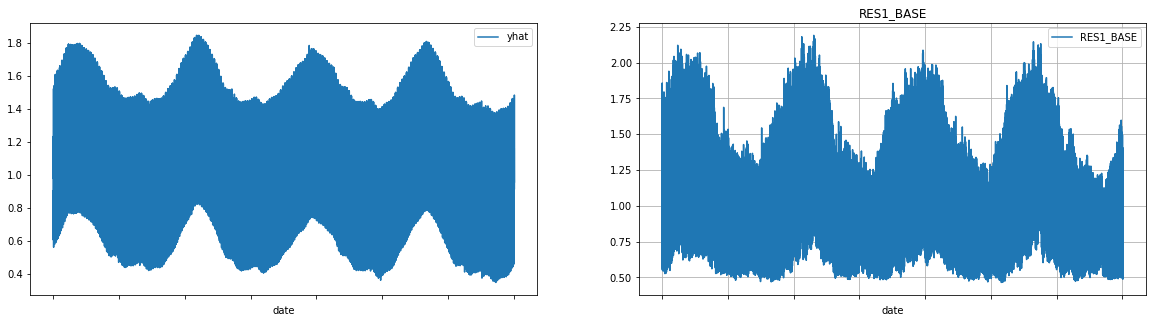

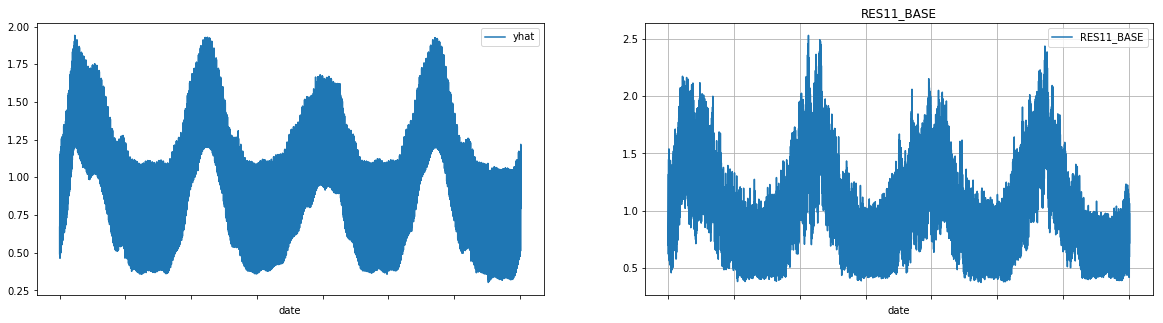

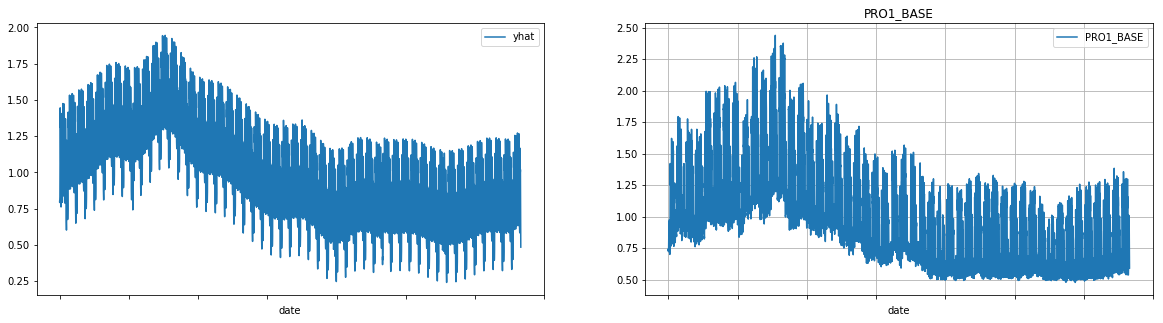

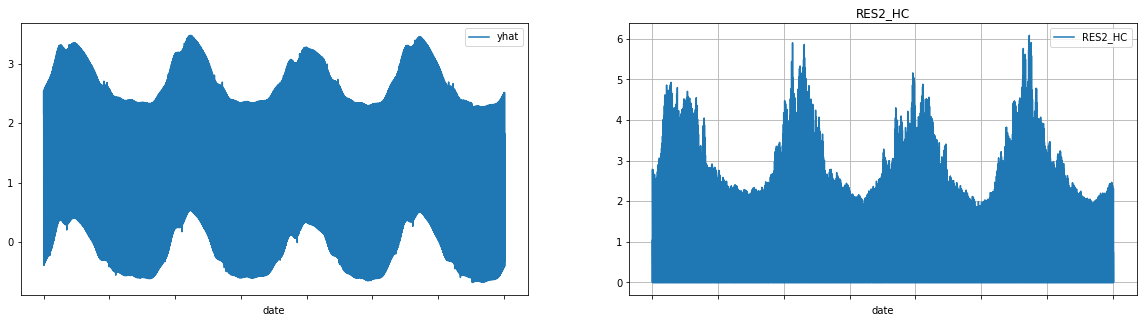

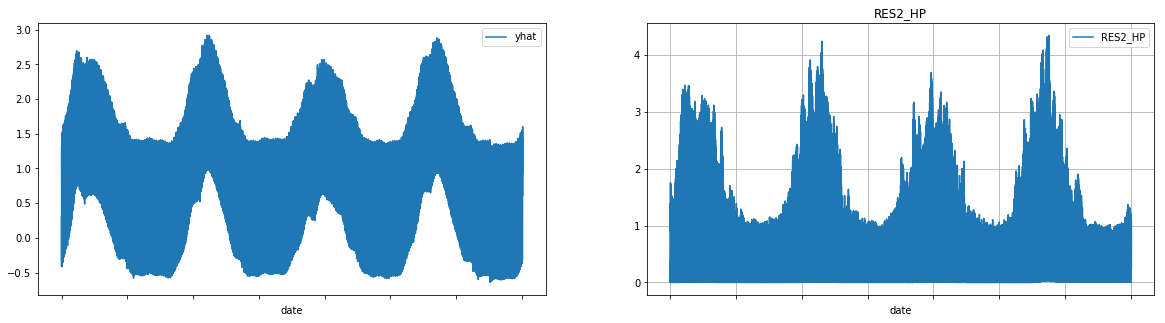

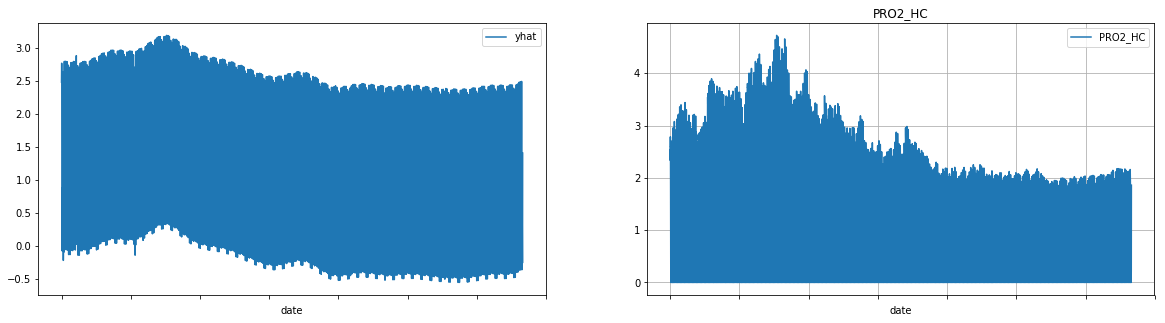

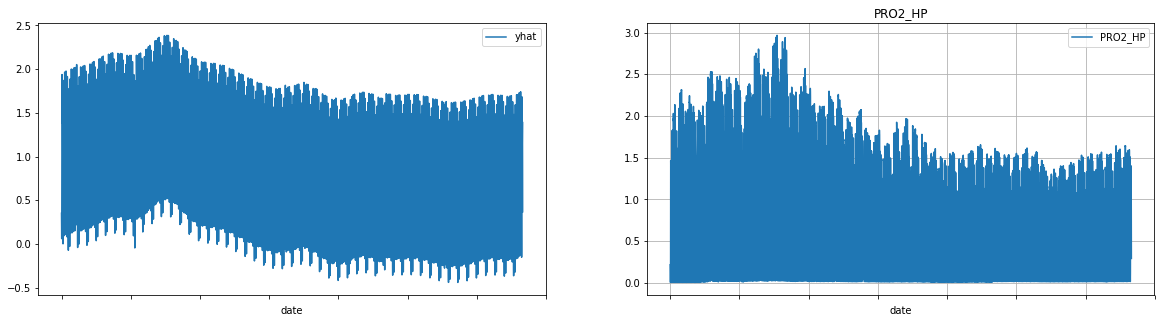

In [5]:
%matplotlib inline

for df in dfs:
    target = df.columns[-1]
    
    data1 = df[['Horodate','yhat']]
    data1.columns = ['date','yhat']
    data1 = data1.set_index(data1.date)
    data1.drop('date',axis=1,inplace=True)
    
    data2 = df[['Horodate',target]]
    data2.columns = ['date',target]
    data2 = data2.set_index(data2.date)
    data2.drop('date',axis=1,inplace=True)
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    data1.plot(ax=axes[0],figsize=(20,5))
    plt.grid(True)
    plt.title('yhat')
    
    plt.title(target)
    data2.plot(ax=axes[1])
    
    plt.grid(True)
    

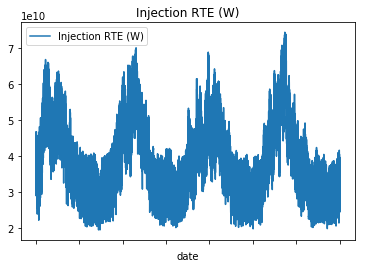

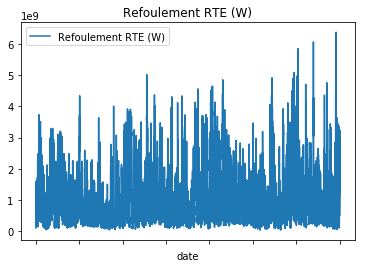

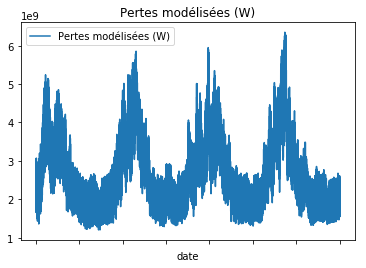

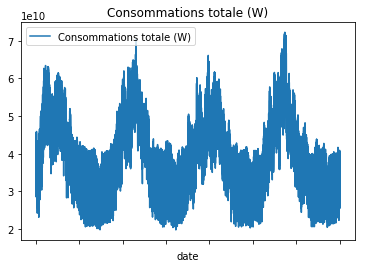

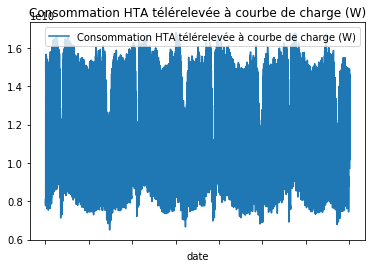

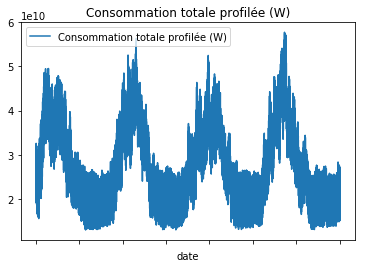

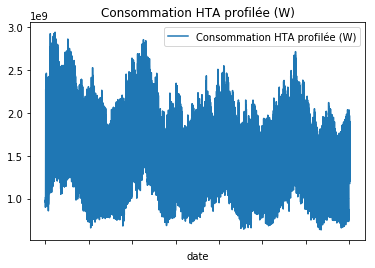

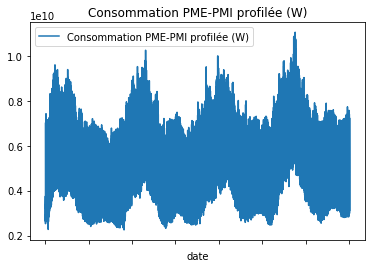

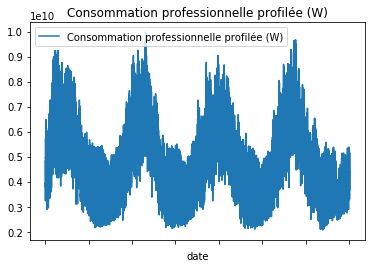

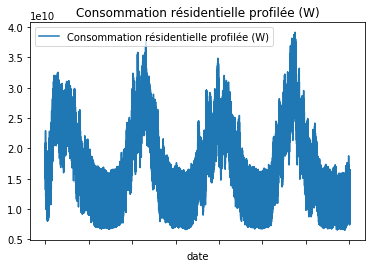

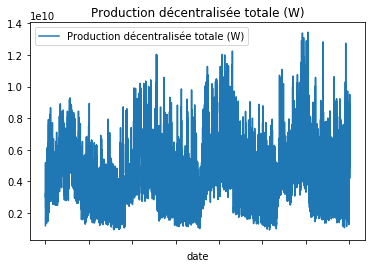

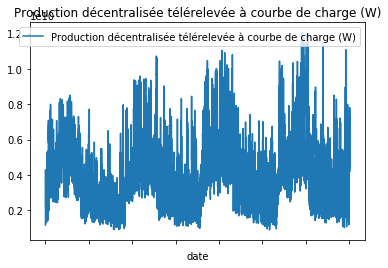

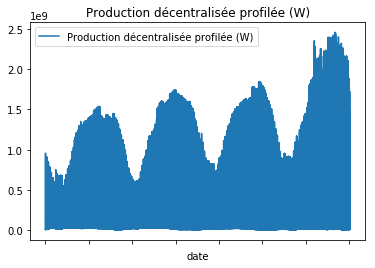

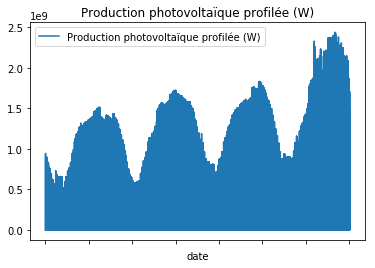

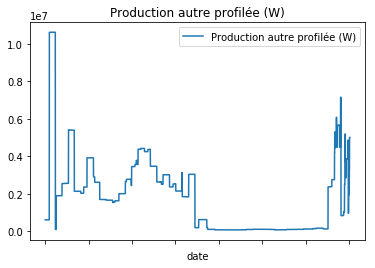

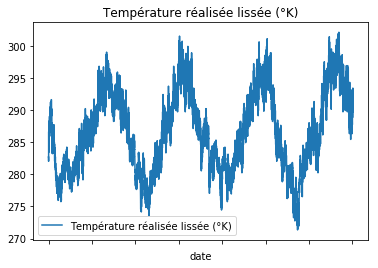

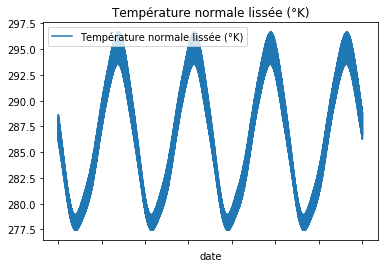

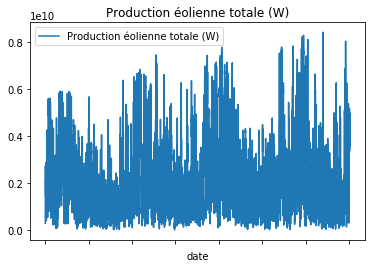

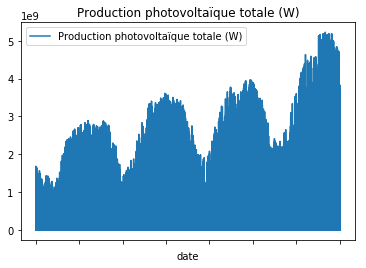

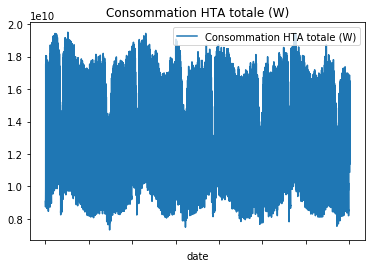

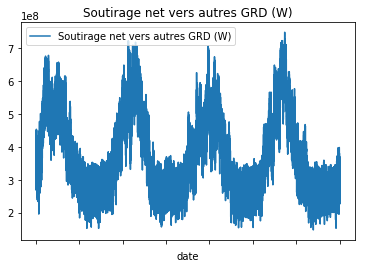

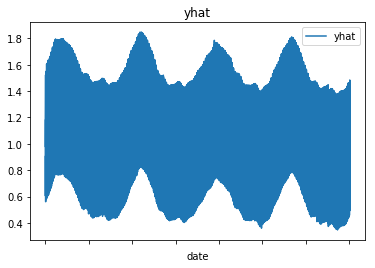

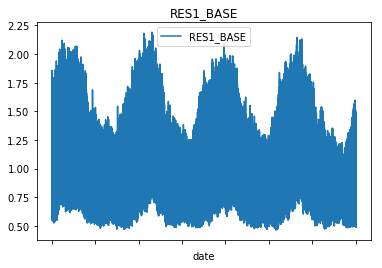

In [6]:
%matplotlib inline

for feature in features:
    df = dfs[0]
    df = df[['Horodate',feature]]
    df.columns = ['date',feature]
    df = df.set_index(df.date)
    df.drop('date',axis=1,inplace=True)
    plt.figure()
    df.plot()
    plt.title(feature)
    plt.show()

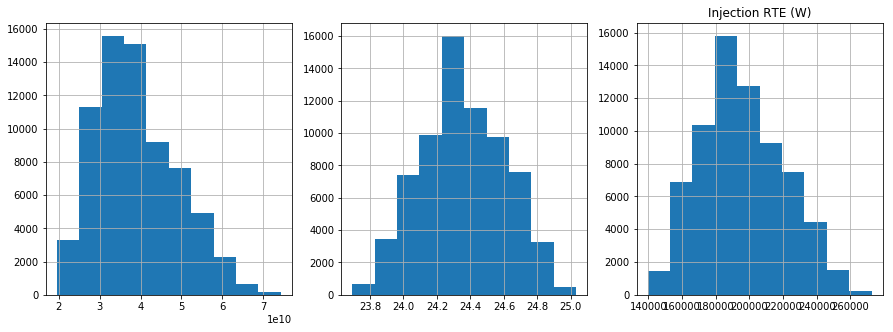

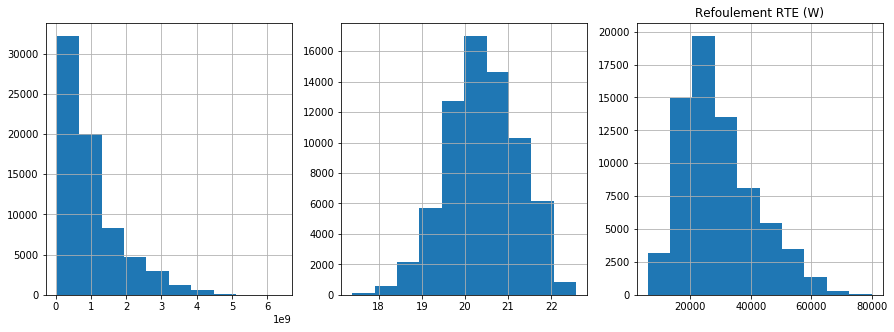

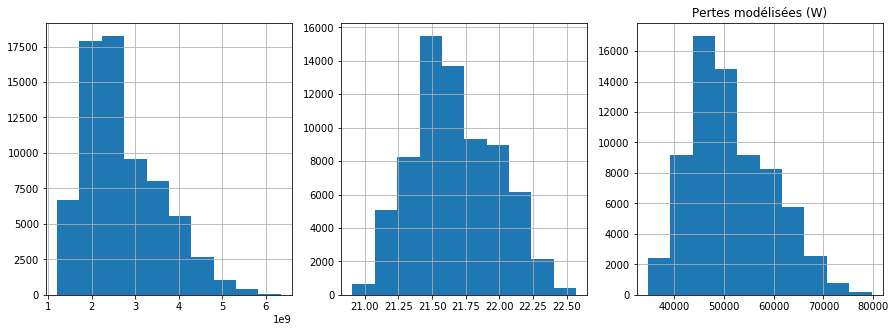

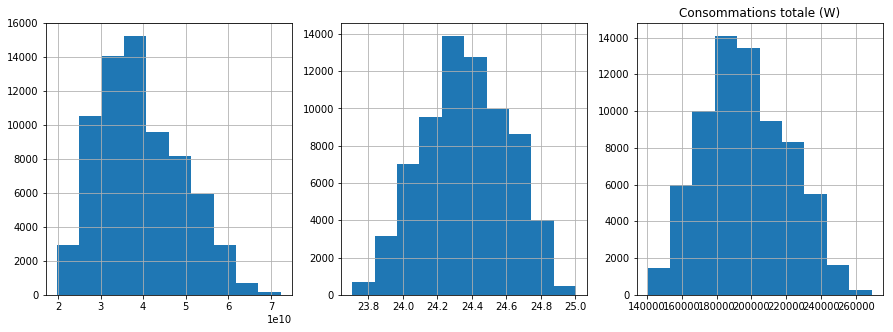

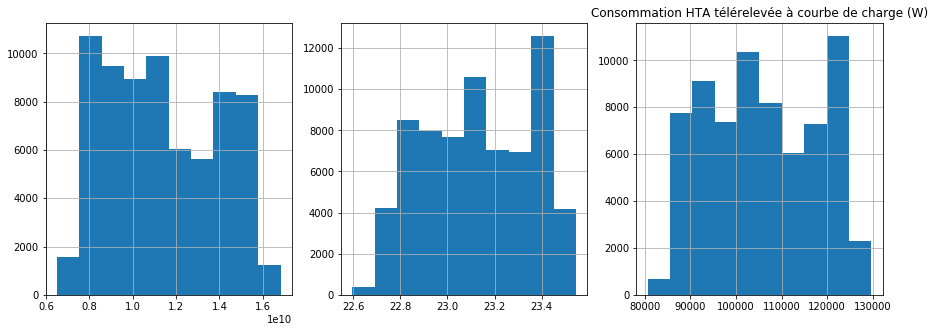

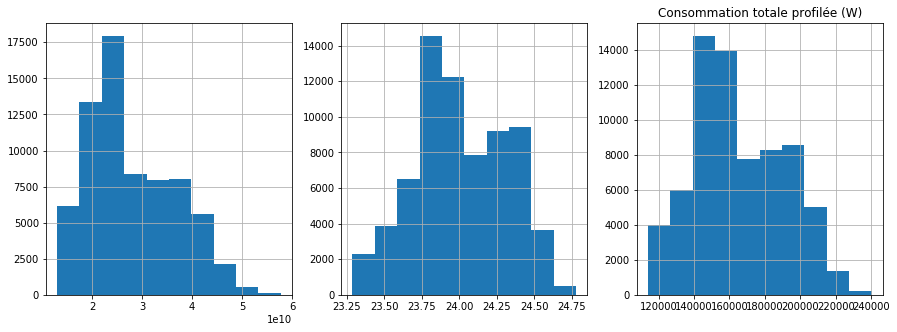

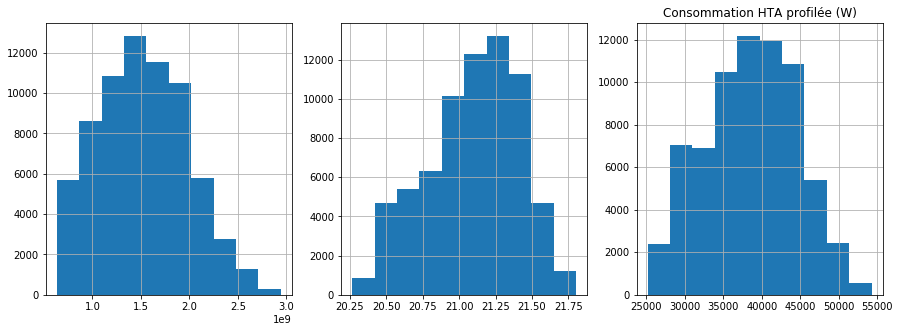

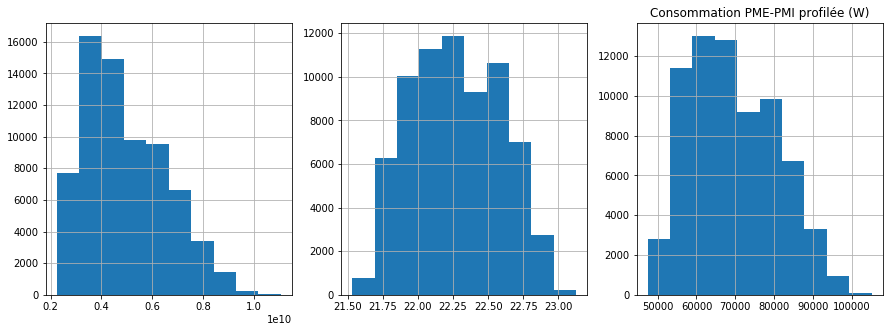

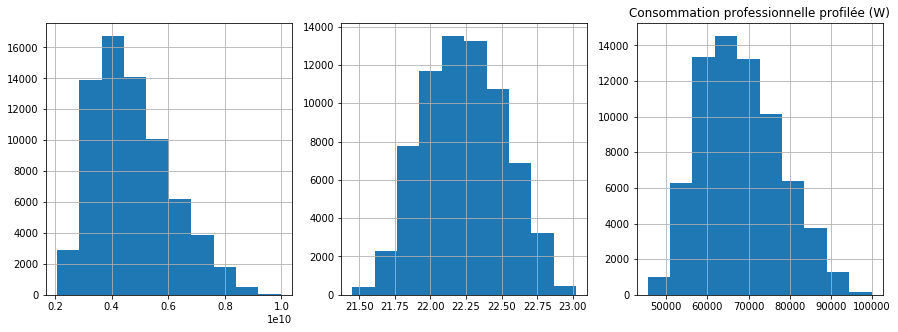

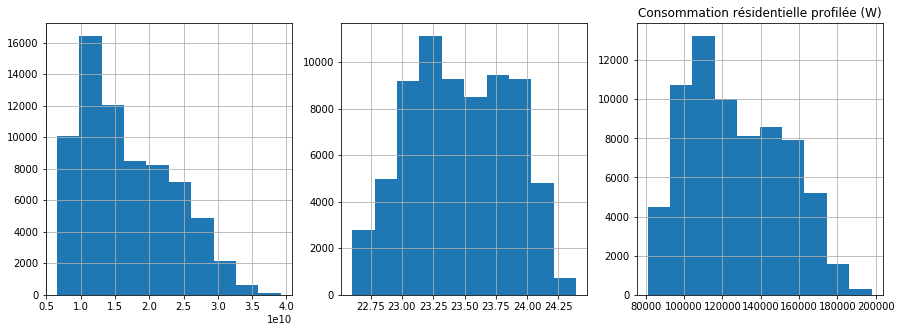

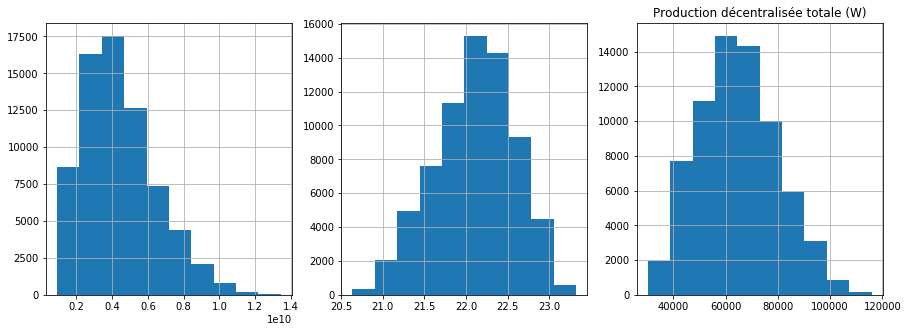

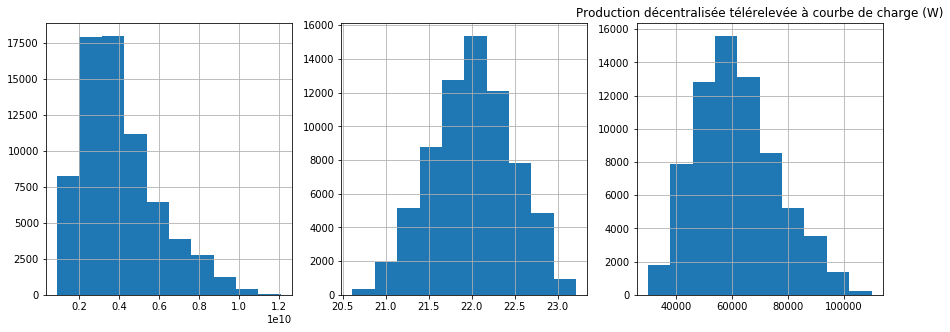

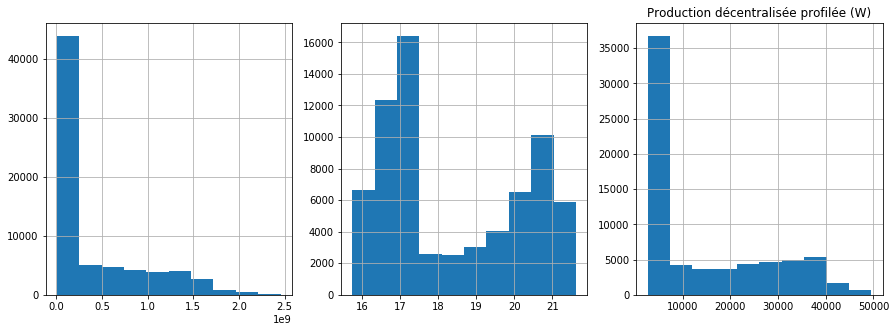

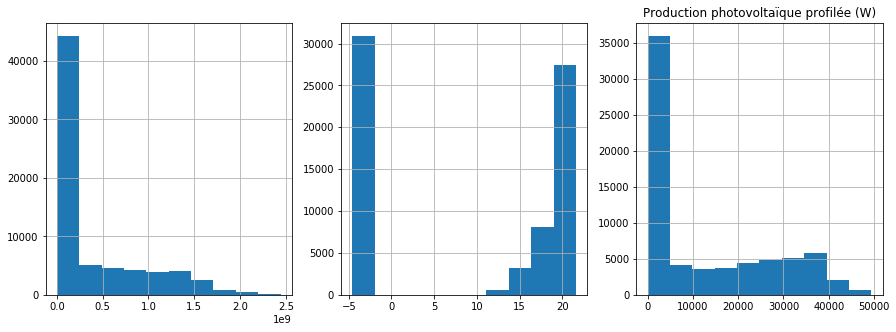

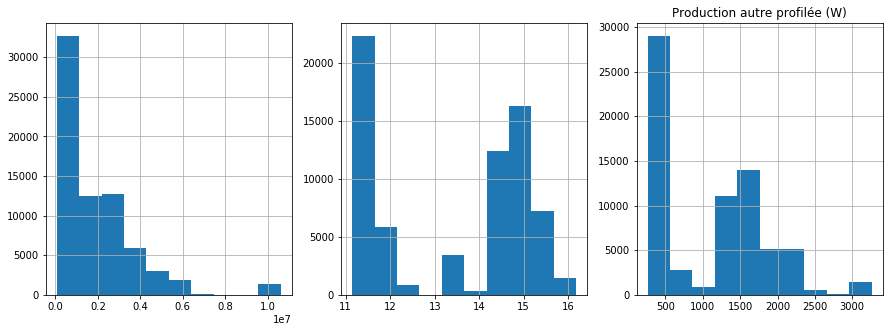

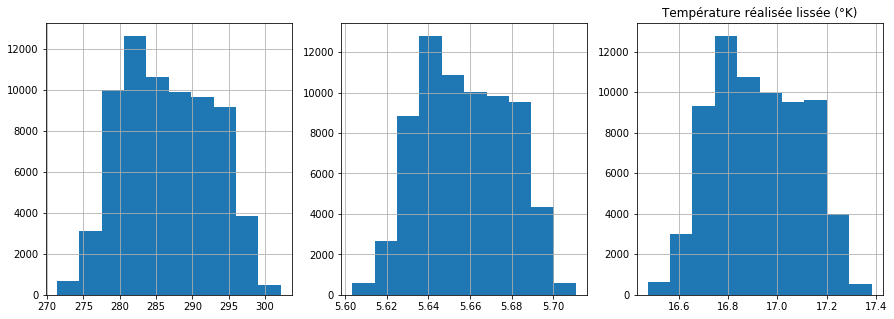

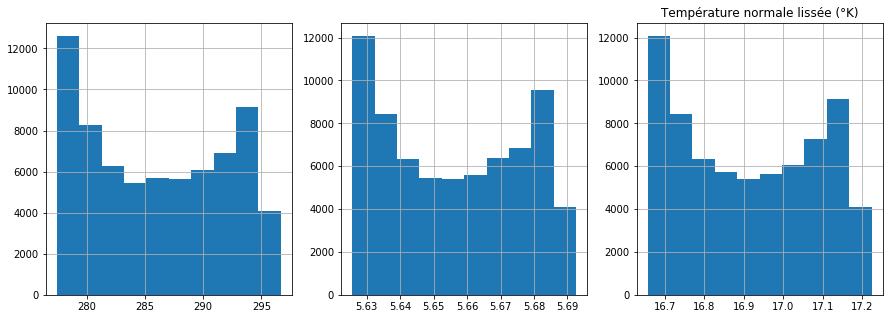

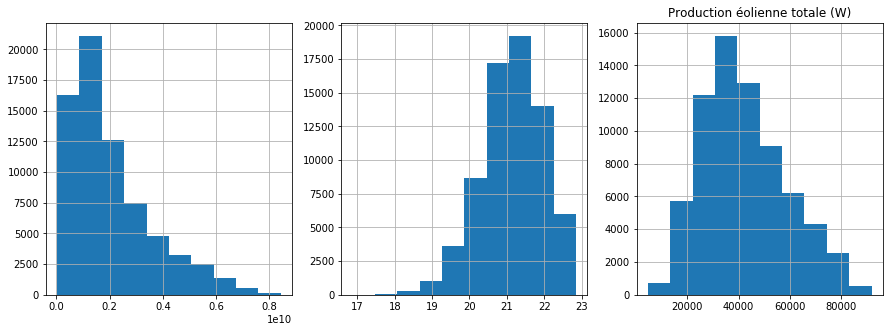

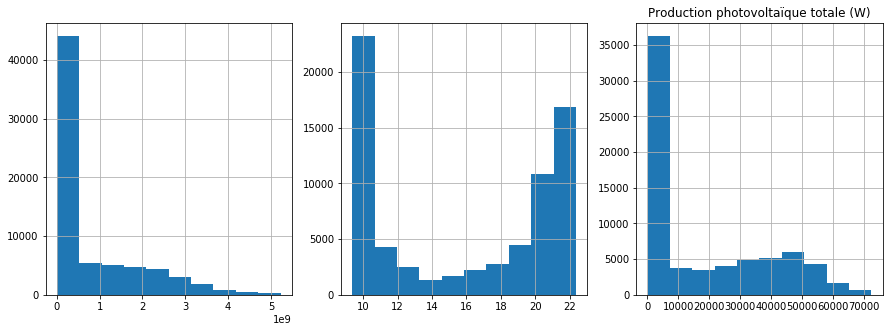

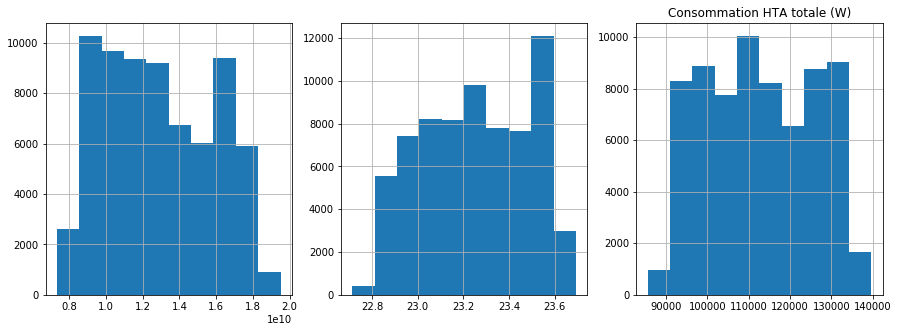

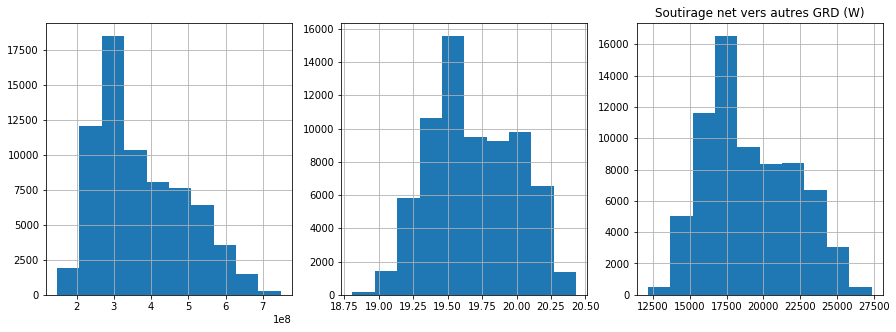

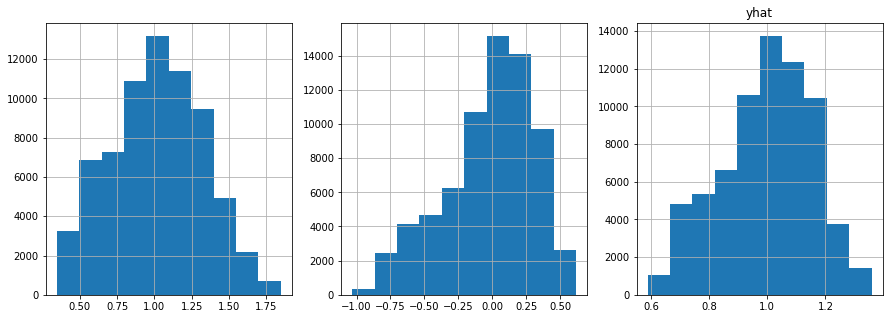

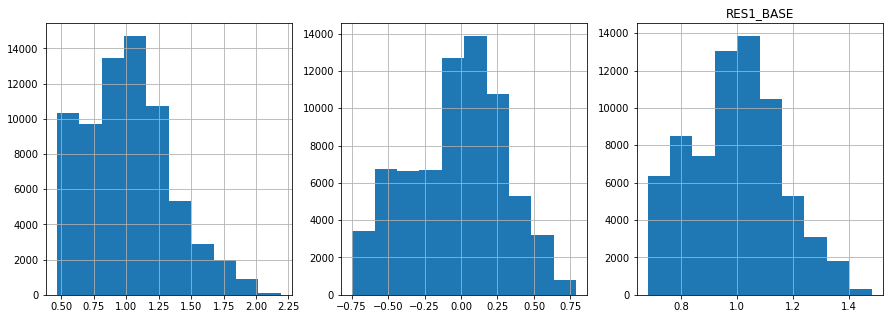

In [7]:
df=dfs[0][features]
df_log = df.apply(lambda x: np.log(x+0.01))
df_sqrt = df.apply(np.sqrt)

for feat in features:
    fig, axes = plt.subplots(nrows=1, ncols=3)
    df[feat].hist(ax=axes[0],figsize=(15,5))
    df_log[feat].hist(ax=axes[1])
    df_sqrt[feat].hist(ax=axes[2])
    plt.title(feat)
    
    plt.show()

In [8]:
to_log = ['Refoulement RTE (W)','Pertes modélisées (W)']
df_log = df.apply(lambda x: np.log(x+0.01))

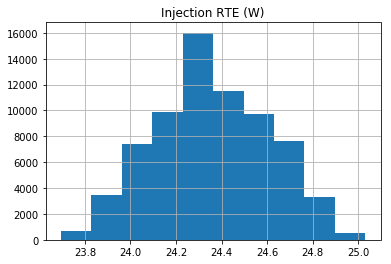

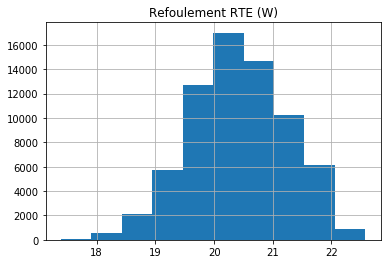

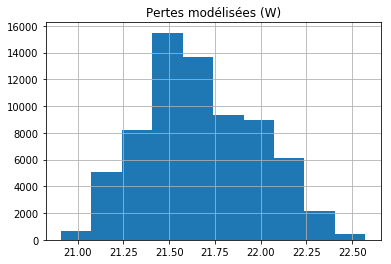

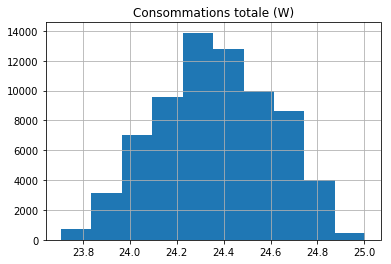

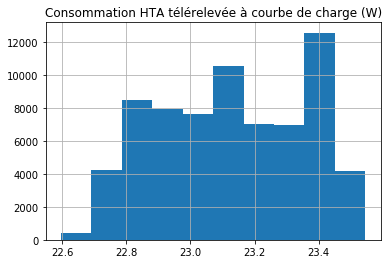

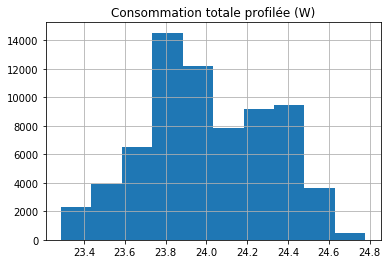

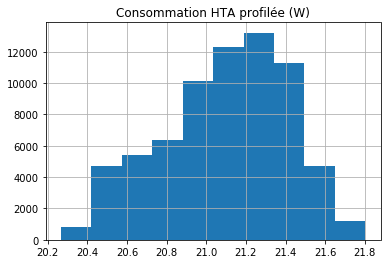

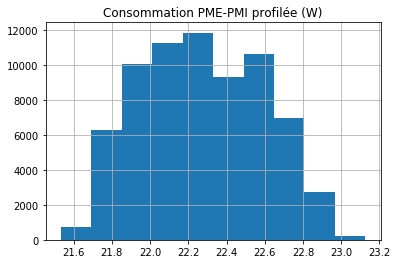

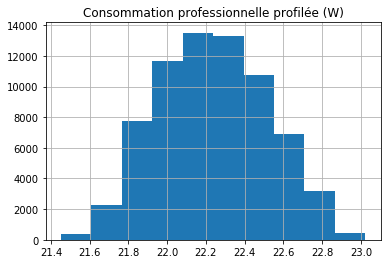

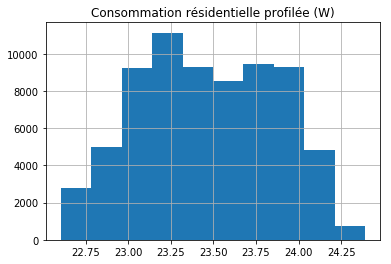

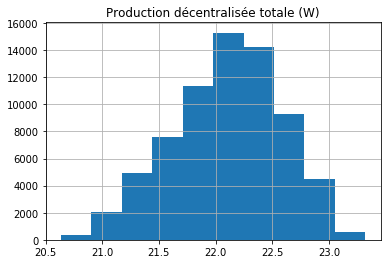

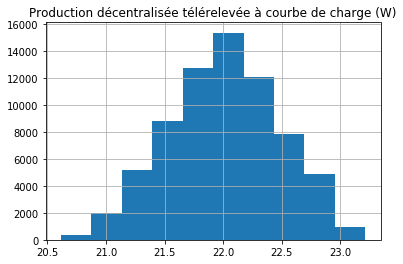

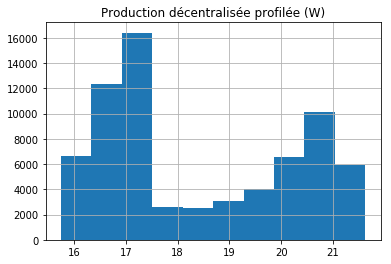

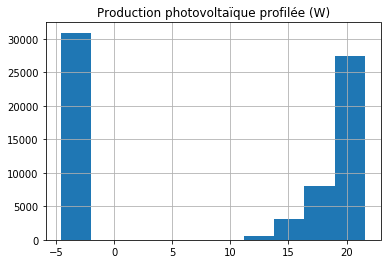

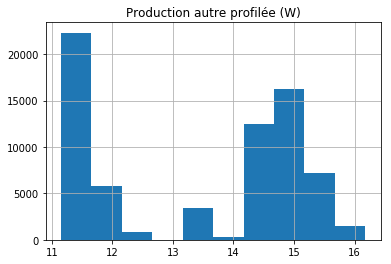

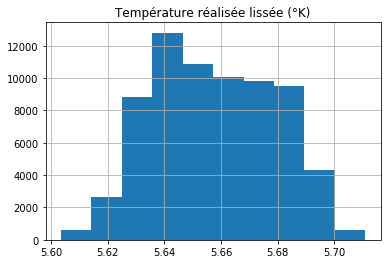

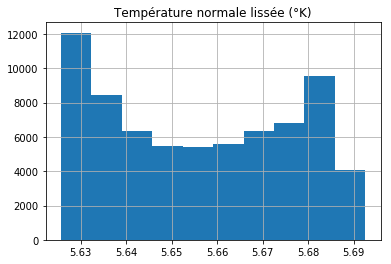

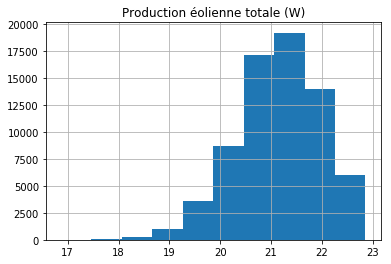

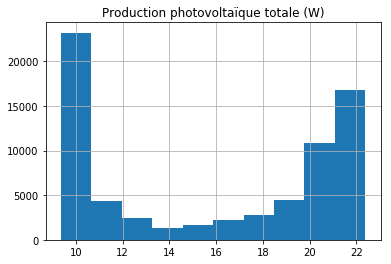

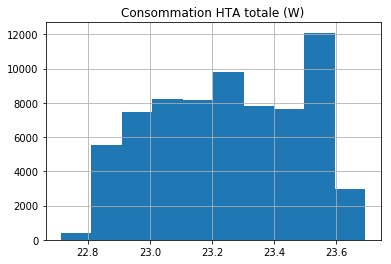

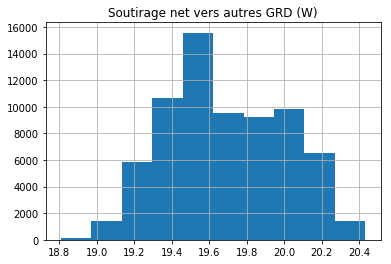

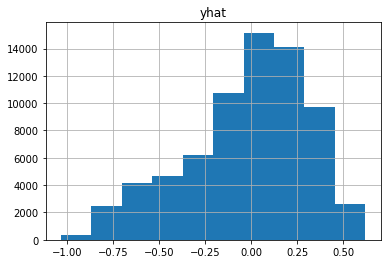

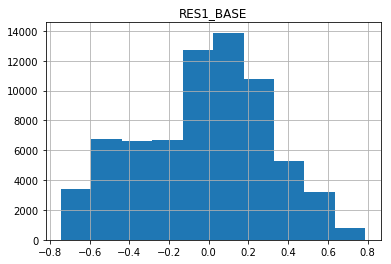

In [9]:
for feat in features:
    df_log[feat].hist()
    plt.title(feat)
    plt.show()

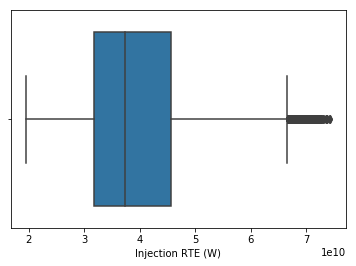

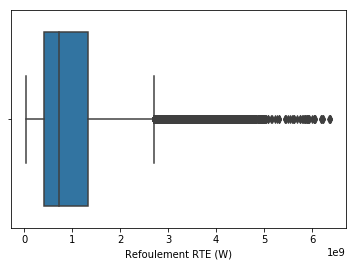

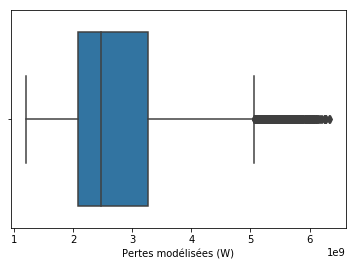

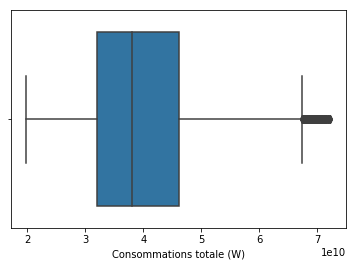

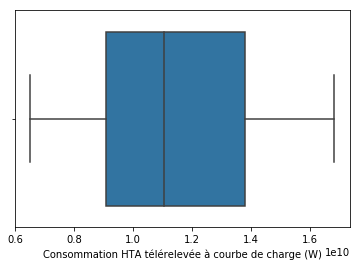

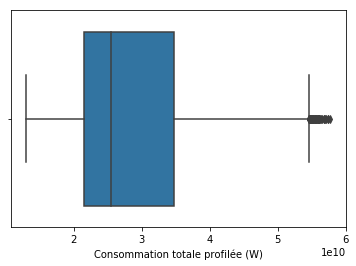

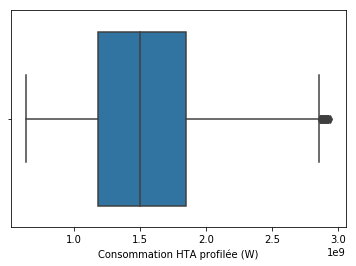

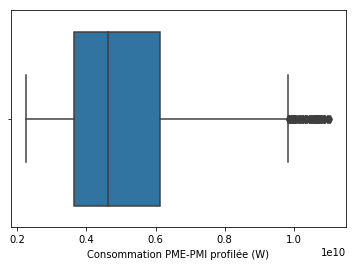

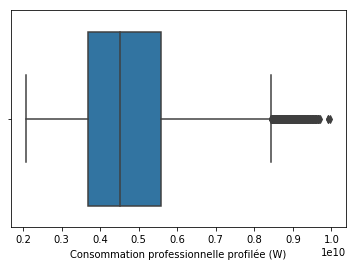

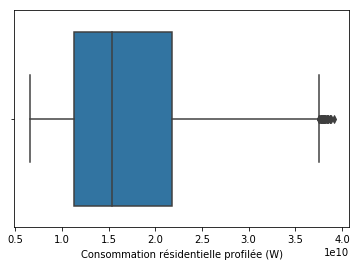

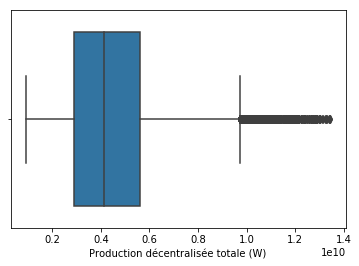

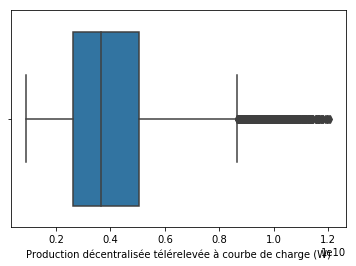

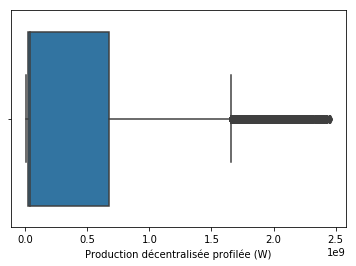

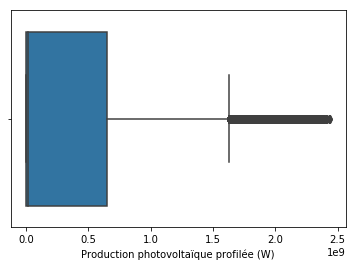

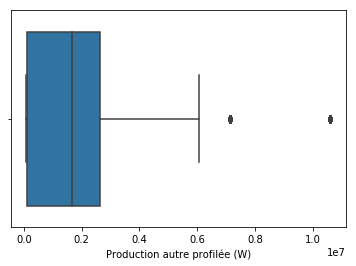

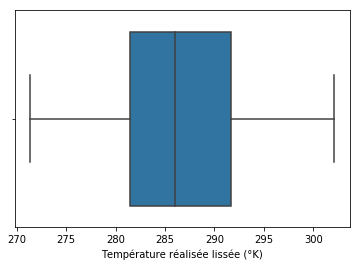

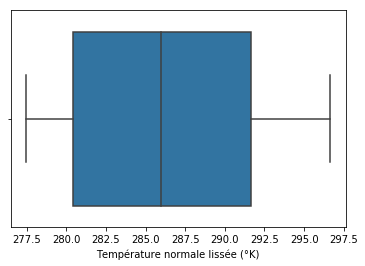

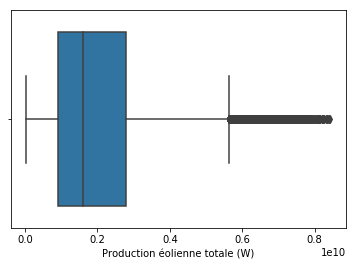

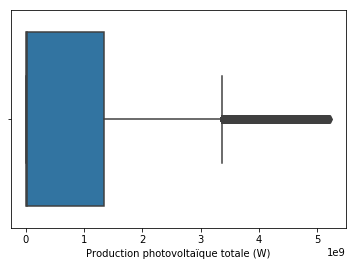

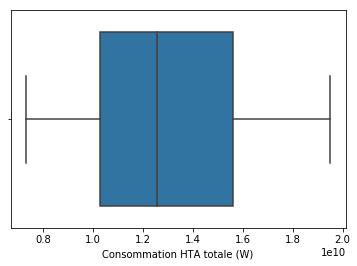

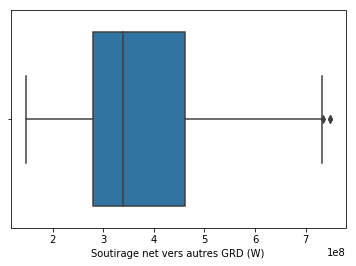

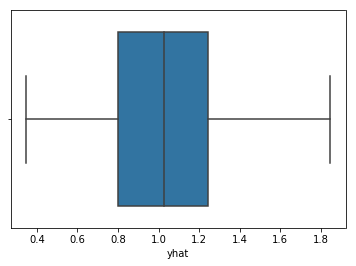

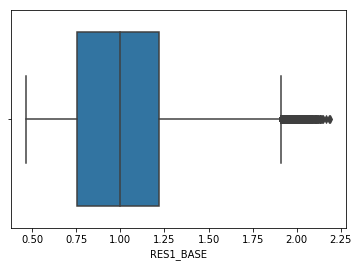

In [10]:
for feat in features:
    sns.boxplot(df[feat])
    plt.show()

# FEATURE IMPORTANCES

In [11]:
df = dfs[3]._get_numeric_data()
df.head()

,IDS,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Consommation HTA totale (W),Soutirage net vers autres GRD (W),yhat,RES2_HC
0,1,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,2924365887,4819516366,20760301211,1181480681,1169604460,11876221,0.0,608873.0,282.75,286.65,302936853.0,19660.0,9072106039,436423300,2.164117,2.780413
1,2,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,2881297990,4765108695,18553188344,1247399186,1235680180,11719006,0.0,608873.0,282.75,286.65,368725682.0,17004.0,9031111381,407924660,2.405821,2.301527
2,3,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,2790724292,4500901592,18187190226,1331017863,1319275090,11742773,0.0,608873.0,282.75,286.65,448572685.0,24299.0,8949500729,398239990,2.530068,2.361320
3,4,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,2653092678,4308193617,18078022135,1435603490,1423884480,11719010,0.0,608873.0,282.65,286.65,550243295.0,23308.0,8882842849,380571680,2.542088,2.567490
4,5,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,2641317515,4166651481,17809803445,1527593647,1515861840,11731807,0.0,608873.0,282.65,286.65,644783673.0,21963.0,8829957877,367153030,2.465302,2.563460


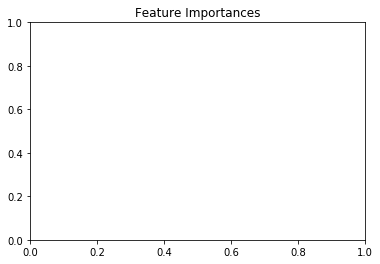

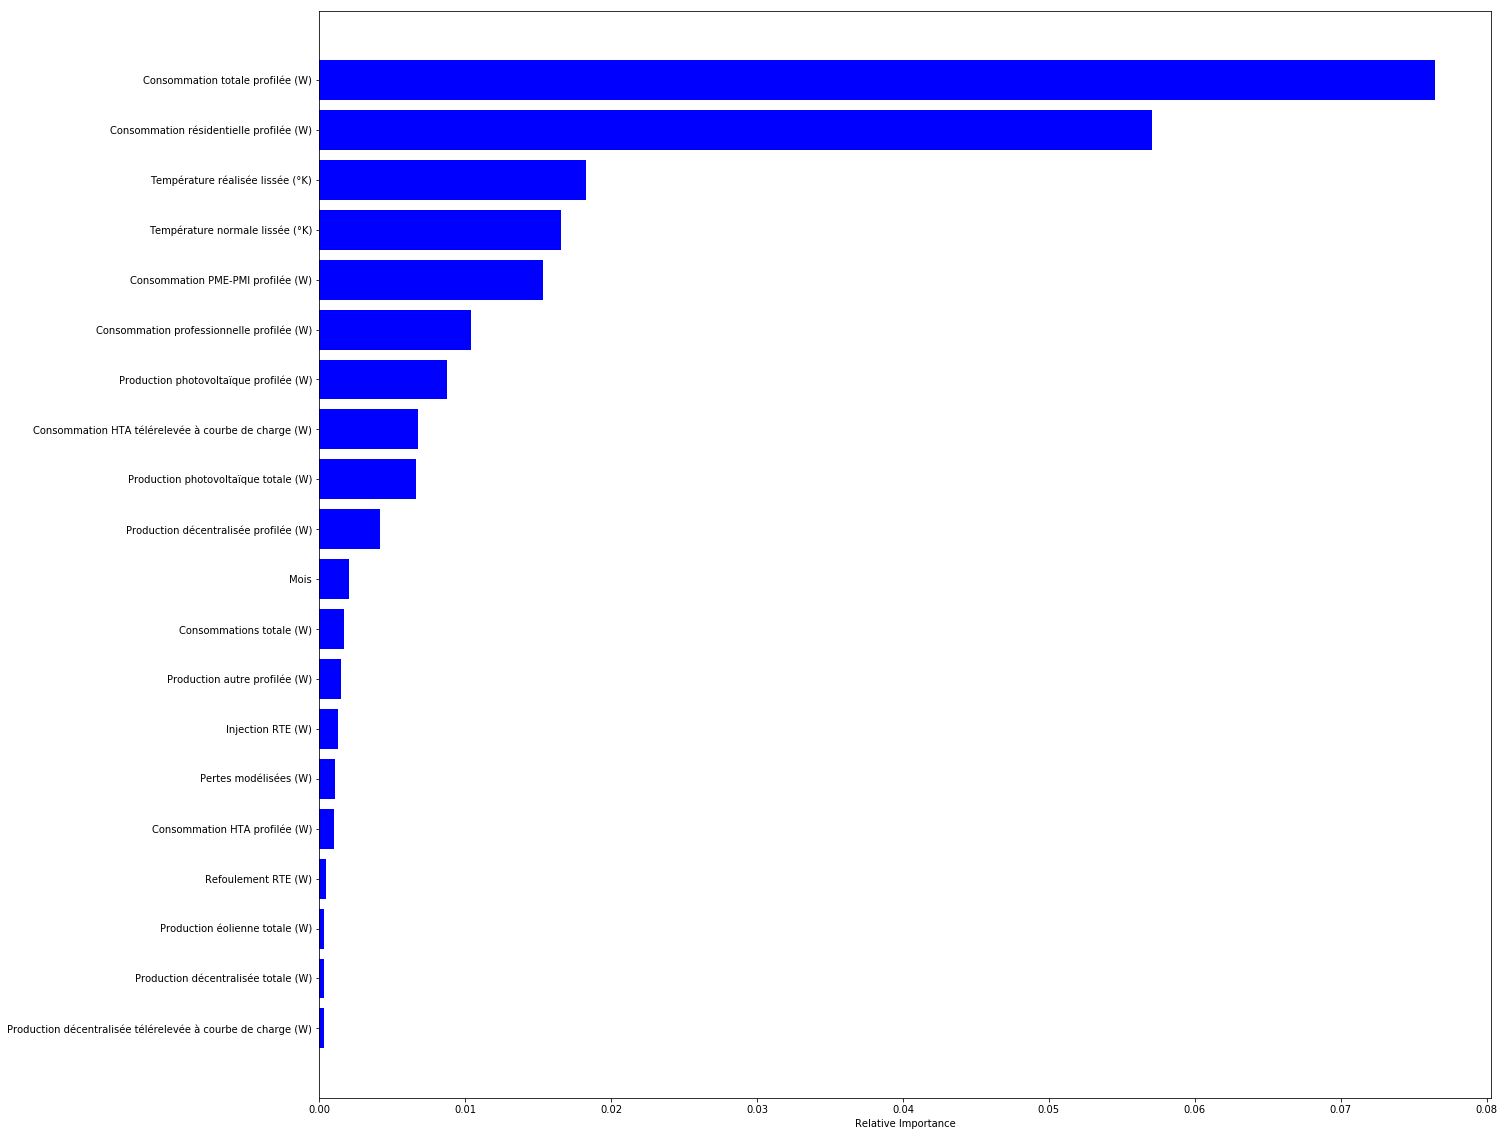

In [12]:
from sklearn.ensemble import RandomForestRegressor
target = df.columns[-1]
model = RandomForestRegressor(random_state=1, max_depth=None)
model.fit(df.drop([target,'IDS'],axis=1),df[target])

df.drop([target,'IDS'],axis=1,inplace=True)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:20])  # top 20 features
plt.title('Feature Importances')
plt.figure(figsize=(21,20))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# CORRELATIONS 

In [13]:
def corr_drop(df,threshold,inf=0):
    
    df = df._get_numeric_data()
    target = df.columns[-1]
    corr_target = dict.fromkeys((df.columns))
    to_drop = []
    features = list(df.columns).copy()
    features.remove('IDS')
    
    for k in features:
        corr_target[k] = np.corrcoef(df[k],df[target])[0,1]
        if abs(corr_target[k])<inf:
            to_drop.append(k)
    
    for i in features:
        for j in features:
            if i !=j:
                if abs(np.corrcoef(df[i],df[j])[0,1])>threshold:
                    coefi, coefj = abs(corr_target[i]),abs(corr_target[j])
                    if coefi > coefj:
                        to_drop.append(j)
                    else:
                        to_drop.append(i)
    to_drop = list(set(to_drop))
    print('Number of columns to drop : ',len(to_drop))
    print('Name of columns to drop :')
    for col in to_drop:
        print(col)
    return to_drop

In [14]:
for df in dfs:
    target = df.columns[-1]
    temp = df.drop('Horodate',axis=1)
    print(temp.corrwith(temp[target]).sort_values())
    print('\n\n')

Température normale lissée (°K)                               -0.331051
Température réalisée lissée (°K)                              -0.330101
IDS                                                           -0.145194
Mois                                                          -0.066495
Refoulement RTE (W)                                            0.053181
Production autre profilée (W)                                  0.062760
Production photovoltaïque totale (W)                           0.112525
Production photovoltaïque profilée (W)                         0.119837
Production décentralisée profilée (W)                          0.122438
Production éolienne totale (W)                                 0.123189
Consommation HTA télérelevée à courbe de charge (W)            0.203469
Consommation HTA totale (W)                                    0.214138
Consommation HTA profilée (W)                                  0.249873
Production décentralisée télérelevée à courbe de charge (W)    0

Température réalisée lissée (°K)                              -0.246704
Température normale lissée (°K)                               -0.242827
IDS                                                           -0.232376
Production autre profilée (W)                                 -0.170944
Mois                                                          -0.070244
Production éolienne totale (W)                                 0.010041
Refoulement RTE (W)                                            0.014168
Production décentralisée télérelevée à courbe de charge (W)    0.248065
Production décentralisée totale (W)                            0.328587
Production photovoltaïque totale (W)                           0.333072
Production décentralisée profilée (W)                          0.333350
Production photovoltaïque profilée (W)                         0.333366
Consommation résidentielle profilée (W)                        0.338639
Soutirage net vers autres GRD (W)                              0

# IMPORT TEST

In [15]:
dfs_test = []

for i in range(len(dfs)):
    dfs_test.append(pd.read_csv('df_test_trend'+str(i)+'v2.0.csv'))

In [16]:
for i in range(len(dfs)):
    to_drop = corr_drop(dfs[i],0.90,inf=0.1)
    print('\n')
    dfs[i].drop(to_drop,axis=1,inplace=True)
    dfs_test[i].drop(to_drop,axis=1,inplace=True)

Number of columns to drop :  17
Name of columns to drop :
Production photovoltaïque totale (W)
Consommation résidentielle profilée (W)
Température réalisée lissée (°K)
Consommations totale (W)
Production éolienne totale (W)
Consommation totale profilée (W)
Consommation HTA totale (W)
Production décentralisée télérelevée à courbe de charge (W)
Mois
Soutirage net vers autres GRD (W)
Consommation professionnelle profilée (W)
yhat
Refoulement RTE (W)
Consommation HTA télérelevée à courbe de charge (W)
Injection RTE (W)
Production photovoltaïque profilée (W)
Production autre profilée (W)


Number of columns to drop :  16
Name of columns to drop :
Production photovoltaïque totale (W)
Consommation résidentielle profilée (W)
Consommations totale (W)
Production éolienne totale (W)
Pertes modélisées (W)
Consommation HTA totale (W)
Température normale lissée (°K)
Production décentralisée profilée (W)
Soutirage net vers autres GRD (W)
Production décentralisée totale (W)
Consommation professionnell

# QUICK ML

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn.decomposition import PCA

In [18]:
X = [x.drop([x.columns[-1],'IDS','Horodate'],axis=1) for x in dfs]
y = [x[x.columns[-1]] for x in dfs]

Dataframe 0 

RMSE 0.1190906122701479
R²_train 0.977820058641018
R²_test 0.8686968343891438
y_moy 1.0179179481108673




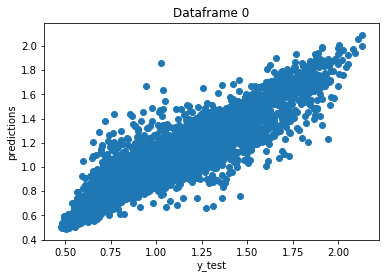





Dataframe 1 

RMSE 0.08338550439260373
R²_train 0.9915583543942246
R²_test 0.9492292174920459
y_moy 1.0053046678726252




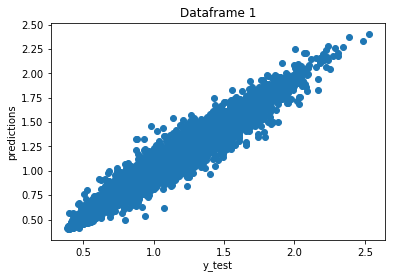





Dataframe 2 

RMSE 0.08173226760867276
R²_train 0.9935571309748247
R²_test 0.9522916498341485
y_moy 0.9944857342770892




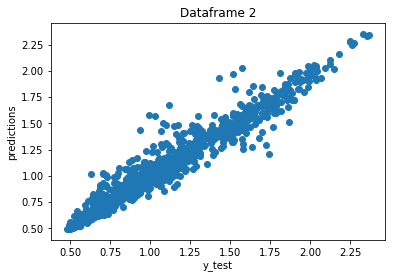





Dataframe 3 

RMSE 0.1785259736138065
R²_train 0.9963422595936254
R²_test 0.9768667597423398
y_moy 0.994113102418277




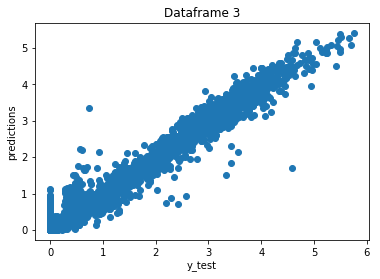





Dataframe 4 

RMSE 0.2916678188685941
R²_train 0.9817154250896941
R²_test 0.8867161150638057
y_moy 1.0181383948014104




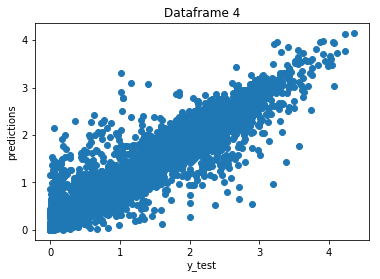





Dataframe 5 

RMSE 0.3411726704248228
R²_train 0.985895884364281
R²_test 0.9097718894329838
y_moy 1.0064882461615972




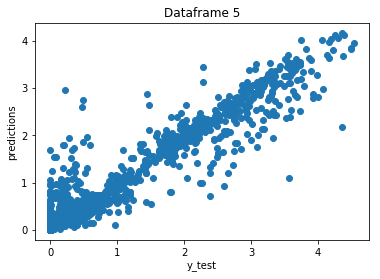





Dataframe 6 

RMSE 0.17731098309700485
R²_train 0.9899833868148411
R²_test 0.935007780221729
y_moy 1.0094449484526897




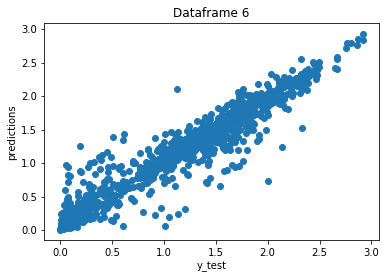





Wall time: 2min 9s


In [19]:
%%time

models = []
predictions = list(range(len(dfs)))
test = list(range(len(dfs)))

for i in range(len(dfs)):
    
    X_train, X_test, y_train, y_test = train_test_split(X[i].apply(lambda x: np.log(x+1)), y[i], test_size=0.1, random_state=101)
    pipeline = make_pipeline(preprocessing.MinMaxScaler(),
                         RandomForestRegressor(n_jobs=-1,n_estimators=20))
    hyperparameters = {}
    clf = GridSearchCV(pipeline,hyperparameters, cv=10)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print('Dataframe',i,'\n')
    print('RMSE',mean_squared_error(y_test, pred)**0.5)
    print ('R²_train',clf.score(X_train,y_train))
    print ('R²_test',clf.score(X_test,y_test))
    print('y_moy',y_train.mean())
    print('\n')
    plt.title('Dataframe '+str(i))
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.scatter(y_test,pred)
    plt.show()
    print('\n')
    #print(clf.get_params())
    print('\n')
    df_pred = pd.DataFrame(pred)
    df_pred.columns = [dfs[i].columns[-1]]
    predictions[i] = df_pred
    test[i] = pd.DataFrame(y_test)
    #joblib.dump(clf, 'rf_regressor_'+str(i)+'.pkl')
    
    
    models.append(clf)

In [29]:
predictions

,RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
0,0.898010,0.781903,1.267613,0.108730,0.671968,5.293105e-03,1.195255
1,1.037640,1.079578,1.600983,0.004738,1.380792,0.000000e+00,2.303201
2,0.572141,0.465118,1.523007,1.522877,0.016126,1.224582e-01,1.645218
3,1.220927,1.602293,1.193925,1.267675,2.433374,3.070972e-01,1.295898
4,0.987626,0.794398,0.631749,0.000008,0.780991,2.609685e-05,1.051024
5,0.576116,0.579785,0.791520,2.107560,0.033601,2.897595e+00,0.014798
6,1.063698,1.016026,0.857084,0.000008,1.195288,2.552531e+00,0.284485
7,0.566153,0.449872,0.940371,1.528490,0.078797,3.252358e+00,0.008981
8,0.987514,0.935424,1.130049,0.000009,0.593213,3.936306e-02,1.324017
9,1.040407,0.837875,0.527083,0.000008,0.757375,1.840780e+00,0.056255


In [26]:
predictions = pd.concat([df for df in predictions],axis=1)
test  = pd.concat([df for df in test],axis=1)

TypeError: cannot concatenate object of type "<class 'str'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

# SUBMISSION

In [30]:
Xt = [x.drop(['IDS','Horodate',],axis=1) for x in dfs_test]
X_test = pd.read_csv('test_clean.csv')

In [31]:
%%time

ids_col = []
final = [x for x in range(len(dfs))]

for i in range(len(dfs)):
    
    pred = models[i].predict(Xt[i])
    df_pred = pd.DataFrame(pred)
    df_pred.columns = [dfs[i].columns[-1]]
    final[i] = df_pred

Wall time: 731 ms


In [32]:
final = pd.concat([df for df in final],axis=1)
final = pd.concat([X_test['IDS'],final],axis=1)

In [24]:
final.head()  

,IDS,RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
0,65137,1.718082,2.197436,1.841682,3.284109,3.863356,0.933971,1.911286
1,65138,1.718082,2.197436,1.841682,3.284109,3.863356,0.933971,1.911286
2,65139,1.718082,2.197436,1.841682,3.284109,3.863356,0.933971,1.911286
3,65140,1.718082,2.197436,1.841682,3.284109,3.863356,0.933971,1.911286
4,65141,1.718082,2.197436,1.841682,3.284109,3.863356,0.933971,1.911286


# EXPORT

In [33]:
pd.DataFrame.to_csv(final,'y_test_pred_csv_file.csv',sep=',',index=False)